In [1]:
%pylab inline
from scipy import optimize
import math
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


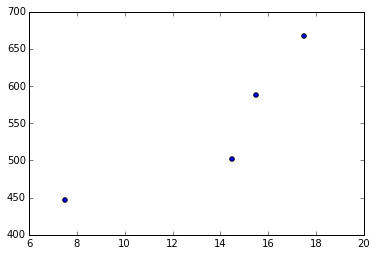

In [2]:
datos=np.loadtxt('he.txt',delimiter='&')
regla=datos[:,0]
teo=datos[:,1]
plt.Figure()
plt.scatter(regla,teo)
plt.show()

In [42]:
#lineal
def lambdalin(x,a,b):
    return a*x+b
#lineales
def lambdaquad(x,a,b,c):
    return a*x**2 + b*x + c
def lambdaquad2(x,a,c):
    return a*x**2  + c
params1, errors1 = optimize.curve_fit(lambdalin,regla,teo, sigma = 0.2, maxfev = 100000)
params2 , errors2 = optimize.curve_fit(lambdaquad,regla ,teo, sigma = 0.2, maxfev = 100000)
params3 , errors3 = optimize.curve_fit(lambdaquad2,regla ,teo, sigma = 0.2, maxfev = 100000)
print params1
print params2
print params3
#print errors1
print errors2
#print errors3

[  19.62744493  281.15513216]
[   4.08997859  -79.46895268  812.44245046]
[   0.84138156  380.02169885]
[[  3.03172357e+00  -7.34558571e+01   3.93820228e+02]
 [ -7.34558571e+01   1.79691724e+03  -9.77770922e+03]
 [  3.93820228e+02  -9.77770922e+03   5.46428540e+04]]


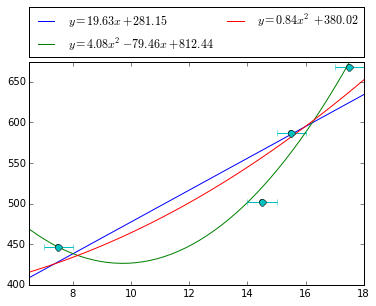

In [44]:
plt.Figure()
x=np.linspace(6,18)
plt.scatter(regla,teo)
plt.plot(x,lambdalin(x,params1[0],params1[1]),label='$y=19.63x+281.15$')
plt.plot(x,(lambdaquad(x,params2[0],params2[1],params2[2])),label='$y=4.08x^2-79.46x+812.44$')
plt.plot(x,(lambdaquad2(x,params3[0],params3[1])),label='$y=0.84x^2+380.02$')
plt.errorbar(regla, teo, fmt = "o",xerr  = 0.5 , markersize = 7 )
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlim(6.5,18)
plt.ylim(400,675)
plt.savefig('he.png')
plt.show()

In [52]:
a = params3[0]
b = params2[1]
c = params3[1]
da = sqrt(errors3[0][0])
db = sqrt(errors3[1][1])
dc = sqrt(errors3[1][1])
# Calcula el error asociado a cada medida teniendo en cuenta la propagacion de error y las incertidumbres del fit
def err(x,dx):
    ans = (da*x**2)**2  + dc**2 + (dx*(2*a*x))**2
    return sqrt(ans)



In [53]:
# Distancias medidas para el espectro del hidrogeno
hx = array([15,20,23])
# Longitudes de onda de las lineas del hidrogeno
hl = lambdaquad2(hx,a,c)
# errores
dhl = err(hx,0.1)
print hl,dhl
hlteo = array([434.0572, 486.135, 656.279])
print (hl-hlteo)/hlteo

[ 569.33254883  716.57432104  825.1125417 ] [  80.9951671   117.08470057  146.76411252]
[ 0.31165328  0.47402331  0.25725879]


In [54]:
n = array([5.0,4.0,3.0])
y = 1/n**2
x = 1/hl
dx = dhl/(hl**2)
print x,dx
# Define la funcion de las series de balmer
def balmer(f,R):
    # k = 1/R
    return R*(1.0/4.0 - f)
# Realiza el fit
params, errors = optimize.curve_fit(balmer,y,x, sigma = dx, maxfev = 10000000)
print params, sqrt(errors), errors

[ 0.00175644  0.00139553  0.00121196] [ 0.00024988  0.00022802  0.00021557]
[ 0.00810111] [[ 0.00037441]] [[  1.40180069e-07]]


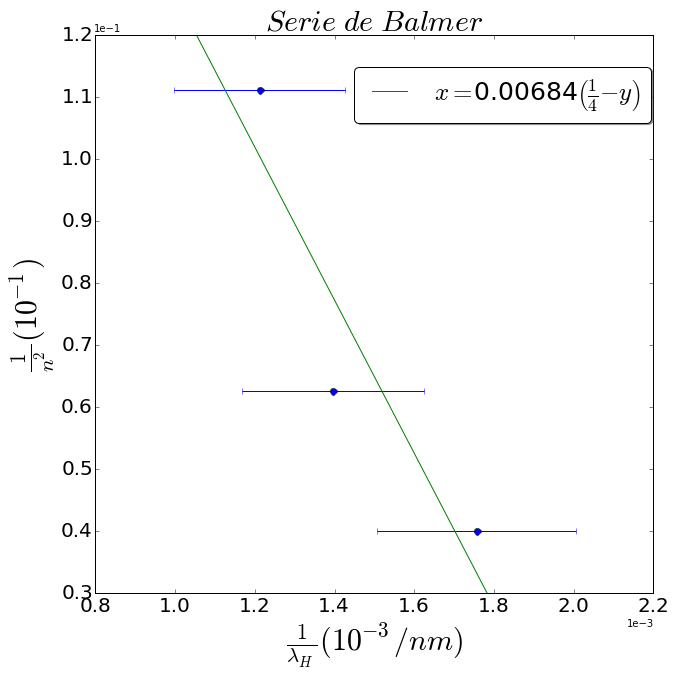

In [55]:
# Grafica 1/lambda  contra 1/n**2
# Grafica el fit contra los datos 
yy = linspace(0.03,0.12, 100)
xx = balmer(yy, params[0])
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.errorbar(x, y, fmt = "o",xerr  = dx , markersize = 7   )
ax.plot(xx,yy, label = r"$x = $" + "0.0081" + r"$\left(\frac{1}{4} -y\right)$")
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylabel(r"$\frac{1}{n^2} (10^{-1})$", fontsize = 30)
ax.set_xlabel(r"$\frac{1}{\lambda_H} (10^{-3}/nm)$", fontsize = 30)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
        
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_title(r"$Serie\ de\ Balmer$", fontsize = 30)
lgd = ax.legend(loc='lower center',bbox_to_anchor=(0.73, 0.82),fancybox=True, shadow=True, fontsize = 25)
fig.savefig('balmer.jpg', bbox_extra_artist=[lgd])

In [ ]:
#Mercurio
# Distancias medidas para el espectro del hidrogeno
hgx = array([8,10,11.7])
# Longitudes de onda de las lineas del hidrogeno
hgl = lambdaquad(hgx,a,b,c)
# errores
dhgl = err(hgx,0.1)
print hgl,dhgl
hglteo = array([435.83, 546.07, 579.06])
print (hgl-hglteo)/hglteo